In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

train_df = pd.read_csv('./data/train.csv', sep=';')
train_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,-0.458258,-0.579012,2.886009,-0.075516,1.674060,-2.431912,0.534850,-0.846473,2
1,1.626615,-0.028332,-1.443184,-1.007447,-0.989093,1.202627,-0.038211,-1.298616,0
2,1.721356,-0.137676,-1.322593,-1.333187,-0.723713,0.843285,-0.588495,0.066682,0
3,-0.715103,3.265915,-0.791030,-2.967881,2.497628,-0.277387,-0.551611,0.668354,2
4,2.944098,0.197871,-2.257025,1.032789,-4.104693,4.716115,-0.380813,-1.393825,0


In [2]:
train_df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.318846,0.005348,-0.327567,0.024042,0.085851,-0.065000,-0.025603,-0.004437,0.985238
std,1.575061,1.605428,1.479745,1.548154,1.788543,2.124337,1.015619,1.003342,0.815098
min,-5.031501,-6.004578,-5.470794,-5.296172,-5.719499,-4.910575,-3.850552,-3.541608,0.000000
25%,-1.406249,-1.119150,-1.368208,-1.083716,-1.136441,-1.613267,-0.701442,-0.659096,0.000000
50%,-0.431219,-0.162577,-0.532158,0.152545,0.102788,-0.431328,-0.007598,-0.019797,1.000000
75%,0.773896,1.127450,0.573801,1.173172,1.507492,1.162813,0.665932,0.667530,2.000000
max,5.388387,7.663112,4.869581,4.318758,6.033273,7.053420,4.400697,3.579874,2.000000


In [3]:
split_ratio = 1/((len(train_df.columns)-1)**0.5 +1)

data = train_df.drop('target', axis=1)
target = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=split_ratio)
print(f'Dataset shape: {train_df.shape}, Train shape: {X_train.shape}, Test shape: {X_test.shape}, Split ratio: {split_ratio:0.2f}')


Dataset shape: (2100, 9), Train shape: (1551, 8), Test shape: (549, 8), Split ratio: 0.26


In [5]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.848816029143898

In [6]:
model.get_depth()

15

In [4]:
params = {'max_depth': range(10, 18, 2), 
          'n_estimators': 1000,
          'criterion':['gini', 'entropy'], 
          'max_features': ['sqrt', 0.33,0.4,0.66,0.8,1]
        }
params = {'criterion':['gini', 'entropy'], 
          'max_features': ['sqrt', 0.33,0.4,0.66,0.8,1]
        }
grid = GridSearchCV(RandomForestClassifier(),
                    params, 
                    cv=5,
                    verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 0.33, 0.4, 0.66, 0.8, 1]},
             verbose=True)

In [5]:
best_model = grid.best_estimator_
best_model.score(X_test, y_test)
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 0.4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<AxesSubplot:title={'center':'Grid search results'}, xlabel='max_features', ylabel='Mean score'>

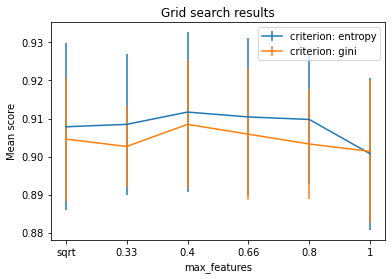

In [6]:
from sklearn_evaluation import plot

plot.grid_search(grid.cv_results_, change='max_features', kind='line')


In [7]:
best_model.score(X_test, y_test)

0.9143897996357013

In [8]:
from sklearn.metrics import f1_score

sc = f1_score(y_test, best_model.predict(X_test), average='weighted')
sc

0.9145413212549942

In [14]:
import pickle

file = 'grid.sav'
with open(file, 'wb') as f:
    pickle.dump(grid, f)

In [15]:
with open(file, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model.cv_results_


{'mean_fit_time': array([0.16716423, 0.16464915, 0.20907779, 0.27554884, 0.3194603 ,
        0.13100691, 0.2045506 , 0.2035006 , 0.25121961, 0.35469623,
        0.42028017, 0.16724086]),
 'std_fit_time': array([0.00117445, 0.00073465, 0.01349863, 0.00354731, 0.01299767,
        0.00188072, 0.00199612, 0.00138943, 0.00282179, 0.006244  ,
        0.01338911, 0.00880766]),
 'mean_score_time': array([0.00834231, 0.00816789, 0.00888963, 0.00802817, 0.0078371 ,
        0.00856662, 0.00807314, 0.00808682, 0.00795789, 0.00812707,
        0.00803084, 0.00873861]),
 'std_score_time': array([1.49931767e-04, 2.61224957e-05, 1.24629288e-03, 1.23345948e-04,
        1.49356283e-04, 3.09875994e-04, 6.63909744e-05, 5.49831910e-05,
        5.44159579e-05, 5.39135814e-04, 2.44544411e-04, 4.41698499e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
        

In [24]:
import numpy as np
pred = best_model.predict(pd.read_csv('./data/test.csv', sep=';')).astype(int)
np.savetxt('intprediction_test.csv', pred, delimiter=';', fmt='%i', header='target')

In [25]:
pred.shape

(900,)

In [38]:
import json

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)

pred_dict = {'target':{}}
pred_dict['target'] = dict(enumerate(pred))
with open('predictions.json', 'w') as file:
    json.dump(pred_dict, file, cls=NpEncoder)


In [37]:
pred_

{'target': {}}